<a href="https://colab.research.google.com/github/Raakshass/nvidia-sentimental-analysis/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

final = pd.DataFrame()

# Iterate through pages 1 to 2 (adjust as needed)
for j in range(1, 31):
    url = f'https://www.moneycontrol.com/news/tags/nvidia.html/page-{j}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all news items on the page
    news = soup.find_all('li', class_='clearfix')

    headlines = []
    dates = []

    for item in news:
        # Extract headline
        headline_tag = item.find('h2')
        if headline_tag:
            headlines.append(headline_tag.text.strip())
        else:
            headlines.append(None)

        # Extract date
        date_tag = item.find('span')
        if date_tag:
            # Clean up the date format to remove time and "IST"
            raw_date = date_tag.text.strip()
            cleaned_date = ' '.join(raw_date.split()[:3])  # Get the first three parts (Month Day, Year)

            # Convert to datetime object and then format as required
            datetime_obj = datetime.strptime(cleaned_date, '%B %d, %Y')
            formatted_date = datetime_obj.strftime('%d-%m-%Y')

            dates.append(formatted_date)
        else:
            dates.append(None)

    # Create DataFrame for current page and append to final DataFrame
    data = {'headlines': headlines, 'dates': dates}
    df = pd.DataFrame(data)
    final = pd.concat([final, df], ignore_index=True)

final




,headlines,dates
0,Nvidia Dethrones Microsoft & Apple as world’s ...,19-06-2024
1,"HPE, Nvidia launch AI solutions portfolio to a...",19-06-2024
2,Nvidia becomes world's most valuable company,18-06-2024
3,Broadcom soars as demand for AI chips powers f...,13-06-2024
4,Can NVIDIA's AI chip reign continue? A look at...,12-06-2024
...,...,...
450,Nvidia Tegra 3 to debut in Asus Transformer 2,19-08-2011
451,Intel sets aside &#36;10 bn to buy up lagging ...,25-01-2011
452,Intel pays Nvidia &#36;1.5 bn in chip dispute,11-01-2011
453,Intel pays Nvidia &#36;1.5 bn in license dispute,11-01-2011


In [ ]:
final.to_csv('nvidia_news.csv', index=False)


In [ ]:
from google.colab import files

# Upload the NVDA(1).csv and _news.csv files
uploaded = files.upload()




Saving NVDA (1).csv to NVDA (1).csv


In [ ]:
#no need
nvidia_df = pd.read_csv('NVDA (1).csv')
nvidia_news_df = pd.read_csv('nvidia_news.csv')

print(nvidia_df.head())
print(nvidia_news_df.head())



         Date     Open     High      Low    Close  Adj Close      Volume
0  10-01-2011  0.48775  0.51675  0.48400  0.51575   0.473060  1750348000
1  11-01-2011  0.52275  0.52775  0.49675  0.50775   0.465722  2711088000
2  12-01-2011  0.50800  0.58425  0.50625  0.58375   0.535431  3431896000
3  13-01-2011  0.57750  0.59600  0.55950  0.58475   0.536349  2695192000
4  14-01-2011  0.57475  0.59950  0.57125  0.58975   0.540934  1595352000
                                           headlines       dates
0  Nvidia Dethrones Microsoft & Apple as world’s ...  19-06-2024
1  HPE, Nvidia launch AI solutions portfolio to a...  19-06-2024
2       Nvidia becomes world's most valuable company  18-06-2024
3  Broadcom soars as demand for AI chips powers f...  13-06-2024
4  Can NVIDIA's AI chip reign continue? A look at...  12-06-2024


In [ ]:
import pandas as pd
from datetime import datetime

# Read the stock data and news data
nvidia_df = pd.read_csv('NVDA (1).csv')
nvidia_news_df = pd.read_csv('nvidia_news.csv')

# Ensure both DataFrames have a 'date' column in the same format
# Use the correct format string '%d-%m-%Y' to match the format in your CSV
nvidia_df['date'] = pd.to_datetime(nvidia_df['Date'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')
nvidia_news_df['date'] = pd.to_datetime(nvidia_news_df['dates'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y')

# Drop the original 'Date' and 'dates' columns
nvidia_df.drop(columns=['Date'], inplace=True)
nvidia_news_df.drop(columns=['dates'], inplace=True)

# Merge the DataFrames on the 'date' column
merged_df = pd.merge(nvidia_news_df, nvidia_df, on='date', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_nvidia_news_stock.csv', index=False)

merged_df

,headlines,date,Open,High,Low,Close,Adj Close,Volume
0,Can NVIDIA's AI chip reign continue? A look at...,12-06-2024,123.059998,126.879997,122.570000,125.199997,125.199997,299595000
1,Nvidia 10-for-1 stock split goes into effect a...,10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700
2,Nvidia sparks chatter over possible Dow inclus...,10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700
3,"Trillion dollar giants Microsoft, Apple bigger...",10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700
4,Mastek stock soars 16% on collaboration with N...,07-06-2024,119.769997,121.692001,118.022003,120.888000,120.878075,412386000
...,...,...,...,...,...,...,...,...
360,Galaxy GTX 560 Ti MDT X5,22-08-2011,0.301500,0.305000,0.295250,0.298500,0.273792,611876000
361,Nvidia Tegra 3 to debut in Asus Transformer 2,19-08-2011,0.293500,0.309750,0.291250,0.293250,0.268977,761332000
362,Intel sets aside &#36;10 bn to buy up lagging ...,25-01-2011,0.615500,0.622000,0.595250,0.599250,0.549648,1086856000
363,Intel pays Nvidia &#36;1.5 bn in chip dispute,11-01-2011,0.522750,0.527750,0.496750,0.507750,0.465722,2711088000


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words and lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(cleaned_tokens)

# Read the merged CSV file
merged_df = pd.read_csv('merged_nvidia_news_stock.csv')

# Apply the preprocess_text function to the headlines column
merged_df['cleaned_headlines'] = merged_df['headlines'].apply(preprocess_text)

# Save the preprocessed DataFrame to a new CSV file
merged_df.to_csv('preprocessed_nvidia_news_stock.csv', index=False)

merged_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,headlines,date,Open,High,Low,Close,Adj Close,Volume,cleaned_headlines
0,Can NVIDIA's AI chip reign continue? A look at...,12-06-2024,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,nvidia ai chip reign continue look rise potent...
1,Nvidia 10-for-1 stock split goes into effect a...,10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,nvidia stock split go effect stock price chipm...
2,Nvidia sparks chatter over possible Dow inclus...,10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,nvidia spark chatter possible dow inclusion st...
3,"Trillion dollar giants Microsoft, Apple bigger...",10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,trillion dollar giant microsoft apple bigger i...
4,Mastek stock soars 16% on collaboration with N...,07-06-2024,119.769997,121.692001,118.022003,120.888000,120.878075,412386000,mastek stock soar collaboration nvidia ai ente...
...,...,...,...,...,...,...,...,...,...
360,Galaxy GTX 560 Ti MDT X5,22-08-2011,0.301500,0.305000,0.295250,0.298500,0.273792,611876000,galaxy gtx ti mdt x
361,Nvidia Tegra 3 to debut in Asus Transformer 2,19-08-2011,0.293500,0.309750,0.291250,0.293250,0.268977,761332000,nvidia tegra debut asus transformer
362,Intel sets aside &#36;10 bn to buy up lagging ...,25-01-2011,0.615500,0.622000,0.595250,0.599250,0.549648,1086856000,intel set aside bn buy lagging share
363,Intel pays Nvidia &#36;1.5 bn in chip dispute,11-01-2011,0.522750,0.527750,0.496750,0.507750,0.465722,2711088000,intel pay nvidia bn chip dispute


In [ ]:
import pandas as pd
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Use the compound score for a single sentiment value

# Read the preprocessed CSV file
merged_df = pd.read_csv('preprocessed_nvidia_news_stock.csv')

# Apply the analyze_sentiment function to the cleaned_headlines column
merged_df['sentiment'] = merged_df['cleaned_headlines'].apply(analyze_sentiment)

# Save the DataFrame with sentiment scores to a new CSV file
merged_df.to_csv('nvidia_news_stock_with_sentiment.csv', index=False)

merged_df


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


,headlines,date,Open,High,Low,Close,Adj Close,Volume,cleaned_headlines,sentiment
0,Can NVIDIA's AI chip reign continue? A look at...,12-06-2024,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,nvidia ai chip reign continue look rise potent...,0.0772
1,Nvidia 10-for-1 stock split goes into effect a...,10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,nvidia stock split go effect stock price chipm...,0.0000
2,Nvidia sparks chatter over possible Dow inclus...,10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,nvidia spark chatter possible dow inclusion st...,0.2263
3,"Trillion dollar giants Microsoft, Apple bigger...",10-06-2024,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,trillion dollar giant microsoft apple bigger i...,0.0000
4,Mastek stock soars 16% on collaboration with N...,07-06-2024,119.769997,121.692001,118.022003,120.888000,120.878075,412386000,mastek stock soar collaboration nvidia ai ente...,0.0000
...,...,...,...,...,...,...,...,...,...,...
360,Galaxy GTX 560 Ti MDT X5,22-08-2011,0.301500,0.305000,0.295250,0.298500,0.273792,611876000,galaxy gtx ti mdt x,0.0000
361,Nvidia Tegra 3 to debut in Asus Transformer 2,19-08-2011,0.293500,0.309750,0.291250,0.293250,0.268977,761332000,nvidia tegra debut asus transformer,0.0000
362,Intel sets aside &#36;10 bn to buy up lagging ...,25-01-2011,0.615500,0.622000,0.595250,0.599250,0.549648,1086856000,intel set aside bn buy lagging share,0.0258
363,Intel pays Nvidia &#36;1.5 bn in chip dispute,11-01-2011,0.522750,0.527750,0.496750,0.507750,0.465722,2711088000,intel pay nvidia bn chip dispute,-0.4767


In [ ]:
import pandas as pd

# Load the DataFrame from the CSV file
merge_df = pd.read_csv('nvidia_news_stock_with_sentiment.csv')

# Ensure 'date' column is in datetime format with correct format
merge_df['date'] = pd.to_datetime(merge_df['date'], format='%d-%m-%Y')

# Sort DataFrame by Date ascending to ensure chronological order
merge_df = merge_df.sort_values(by='date').reset_index(drop=True)

# Calculate previous day's close price and label data
merge_df['Prev_Close'] = merge_df['Close'].shift(1)

# Function to label data based on price movements
def label_data(row):
    if row['Close'] < row['Prev_Close']:
        return 'decrease'
    elif row['Close'] > row['Prev_Close']:
        return 'increase'
    else:
        return 'no change'

merge_df['Label'] = merge_df.apply(label_data, axis=1)

# Fill the first row values for Prev_Close and Label
first_row = merge_df.iloc[0]
merge_df.at[first_row.name, 'Prev_Close'] = first_row['Close']  # Assuming 'Close' is the initial price
merge_df.at[first_row.name, 'Label'] = 'no change'  # Assuming initial day is 'no change'

# Display the first few rows to verify
print(merge_df.head())

# Save the labeled DataFrame to a new CSV file
merge_df.to_csv('nvidia_news_stock_with_sentiment_labeled.csv', index=False)
merge_df

                                           headlines       date     Open  \
0   Intel pays Nvidia &#36;1.5 bn in license dispute 2011-01-11  0.52275   
1      Intel pays Nvidia &#36;1.5 bn in chip dispute 2011-01-11  0.52275   
2  Intel sets aside &#36;10 bn to buy up lagging ... 2011-01-25  0.61550   
3      Nvidia Tegra 3 to debut in Asus Transformer 2 2011-08-19  0.29350   
4                           Galaxy GTX 560 Ti MDT X5 2011-08-22  0.30150   

      High      Low    Close  Adj Close      Volume  \
0  0.52775  0.49675  0.50775   0.465722  2711088000   
1  0.52775  0.49675  0.50775   0.465722  2711088000   
2  0.62200  0.59525  0.59925   0.549648  1086856000   
3  0.30975  0.29125  0.29325   0.268977   761332000   
4  0.30500  0.29525  0.29850   0.273792   611876000   

                      cleaned_headlines  sentiment  Prev_Close      Label  
0   intel pay nvidia bn license dispute    -0.4767     0.50775  no change  
1      intel pay nvidia bn chip dispute    -0.4767     0.507

,headlines,date,Open,High,Low,Close,Adj Close,Volume,cleaned_headlines,sentiment,Prev_Close,Label
0,Intel pays Nvidia &#36;1.5 bn in license dispute,2011-01-11,0.522750,0.527750,0.496750,0.507750,0.465722,2711088000,intel pay nvidia bn license dispute,-0.4767,0.507750,no change
1,Intel pays Nvidia &#36;1.5 bn in chip dispute,2011-01-11,0.522750,0.527750,0.496750,0.507750,0.465722,2711088000,intel pay nvidia bn chip dispute,-0.4767,0.507750,no change
2,Intel sets aside &#36;10 bn to buy up lagging ...,2011-01-25,0.615500,0.622000,0.595250,0.599250,0.549648,1086856000,intel set aside bn buy lagging share,0.0258,0.507750,increase
3,Nvidia Tegra 3 to debut in Asus Transformer 2,2011-08-19,0.293500,0.309750,0.291250,0.293250,0.268977,761332000,nvidia tegra debut asus transformer,0.0000,0.599250,decrease
4,Galaxy GTX 560 Ti MDT X5,2011-08-22,0.301500,0.305000,0.295250,0.298500,0.273792,611876000,galaxy gtx ti mdt x,0.0000,0.293250,increase
...,...,...,...,...,...,...,...,...,...,...,...,...
360,Mastek stock soars 16% on collaboration with N...,2024-06-07,119.769997,121.692001,118.022003,120.888000,120.878075,412386000,mastek stock soar collaboration nvidia ai ente...,0.0000,120.998001,decrease
361,"Trillion dollar giants Microsoft, Apple bigger...",2024-06-10,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,trillion dollar giant microsoft apple bigger i...,0.0000,120.888000,increase
362,Nvidia sparks chatter over possible Dow inclus...,2024-06-10,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,nvidia spark chatter possible dow inclusion st...,0.2263,121.790001,no change
363,Nvidia 10-for-1 stock split goes into effect a...,2024-06-10,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,nvidia stock split go effect stock price chipm...,0.0000,121.790001,no change


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming merge_df contains the relevant features and labels
# Features: 'Sentiment', 'Cleaned_Text' (if applicable), 'Close', 'Prev_Close'
# Target Variable: 'Label'

# Inspect columns in merge_df
print(merge_df.columns)

# Adjust features list based on the actual columns in merge_df
features = ['sentiment', 'Close', 'Prev_Close']  # Adjust based on actual column names

# Ensure 'Label' is correctly specified as the target variable
target = 'Label'

# Split data into features (X) and target variable (y)
X = merge_df[features]
y = merge_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added this line to split the data

from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform imputer on X_train
X_train_imputed = imputer.fit_transform(X_train)

# Transform X_test using the fitted imputer
X_test_imputed = imputer.transform(X_test)

# Continue with model training
log_reg_model = LogisticRegression() # Initialize the model
log_reg_model.fit(X_train_imputed, y_train)

# Predict labels on the test set
y_pred = log_reg_model.predict(X_test_imputed)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)

Index(['headlines', 'date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'cleaned_headlines', 'sentiment', 'Prev_Close', 'Label'],
      dtype='object')
Accuracy: 0.7808219178082192

Classification Report:
              precision    recall  f1-score   support

    decrease       1.00      0.75      0.86        28
    increase       0.61      0.91      0.73        22
   no change       0.84      0.70      0.76        23

    accuracy                           0.78        73
   macro avg       0.82      0.78      0.78        73
weighted avg       0.83      0.78      0.79        73



In [ ]:
def find_trading_signals(sentiments, close_prices, buy_threshold=0.1, sell_threshold=-0.1):
    signals = []
    for sentiment, close_price in zip(sentiments, close_prices):
        if sentiment > buy_threshold:
            signals.append(1)  # Buy signal
        elif sentiment < sell_threshold:
            signals.append(-1)  # Sell signal
        else:
            signals.append(0)  # Hold signal
    return signals


In [ ]:
import matplotlib.pyplot as plt

def plot_trading_signals(dates, close_prices, signals):
    plt.figure(figsize=(14, 7))
    plt.plot(dates, close_prices, marker='o', linestyle='-', color='b', label='Close Price')

    # Plot buy signals (green)
    plt.plot([dates[i] for i in range(len(signals)) if signals[i] == 1],
             [close_prices[i] for i in range(len(signals)) if signals[i] == 1],
             '^', markersize=10, color='g', label='Buy Signal')

    # Plot sell signals (red)
    plt.plot([dates[i] for i in range(len(signals)) if signals[i] == -1],
             [close_prices[i] for i in range(len(signals)) if signals[i] == -1],
             'v', markersize=10, color='r', label='Sell Signal')

    plt.title('Trading Signals Based on Sentiment Analysis')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
def calculate_portfolio_returns(dates, close_prices, signals):
    portfolio = 0  # Portfolio position: 1 for holding stock, 0 for not holding
    cash = 10000  # Starting cash balance
    stock_value = 0  # Value of the stocks currently held
    num_trades = 0  # Count of total trades executed
    win_trades = 0  # Count of winning trades

    for i in range(1, len(dates)):
        if signals[i] == 1 and portfolio == 0:  # Buy signal
            portfolio = 1
            num_trades += 1
            stock_value = cash / close_prices[i]
            cash = 0
        elif signals[i] == -1 and portfolio == 1:  # Sell signal
            portfolio = 0
            num_trades += 1
            cash = stock_value * close_prices[i]
            stock_value = 0
            if cash > 10000:
                win_trades += 1

    # Calculate final portfolio value and returns
    final_portfolio_value = cash if portfolio == 0 else stock_value * close_prices[-1]
    returns = (final_portfolio_value - 10000) / 10000

    return final_portfolio_value, returns, num_trades, win_trades / num_trades if num_trades > 0 else 0



In [ ]:
def calculate_portfolio_returns(dates, close_prices, signals):
    portfolio = 0  # Portfolio position: 1 for holding stock, 0 for not holding
    cash = 10000  # Starting cash balance
    stock_value = 0  # Value of the stocks currently held
    num_trades = 0  # Count of total trades executed
    win_trades = 0  # Count of winning trades

    for i in range(1, len(dates)):
        if signals[i] == 1 and portfolio == 0:  # Buy signal
            portfolio = 1
            num_trades += 1
            stock_value = cash / close_prices[i]
            cash = 0
        elif signals[i] == -1 and portfolio == 1:  # Sell signal
            portfolio = 0
            num_trades += 1
            cash = stock_value * close_prices[i]
            stock_value = 0
            if cash > 10000:
                win_trades += 1

    # Calculate final portfolio value and returns
    final_portfolio_value = cash if portfolio == 0 else stock_value * close_prices[-1]
    returns = (final_portfolio_value - 10000) / 10000

    return final_portfolio_value, returns, num_trades, win_trades / num_trades if num_trades > 0 else 0


In [ ]:
import numpy as np

def calculate_sharpe_ratio(returns):
    return np.sqrt(252) * (np.mean(returns) / np.std(returns))

def calculate_maximum_drawdown(returns):
    cum_returns = np.cumsum(returns)
    peak = np.maximum.accumulate(cum_returns)
    drawdown = (cum_returns - peak) / peak
    return np.min(drawdown)


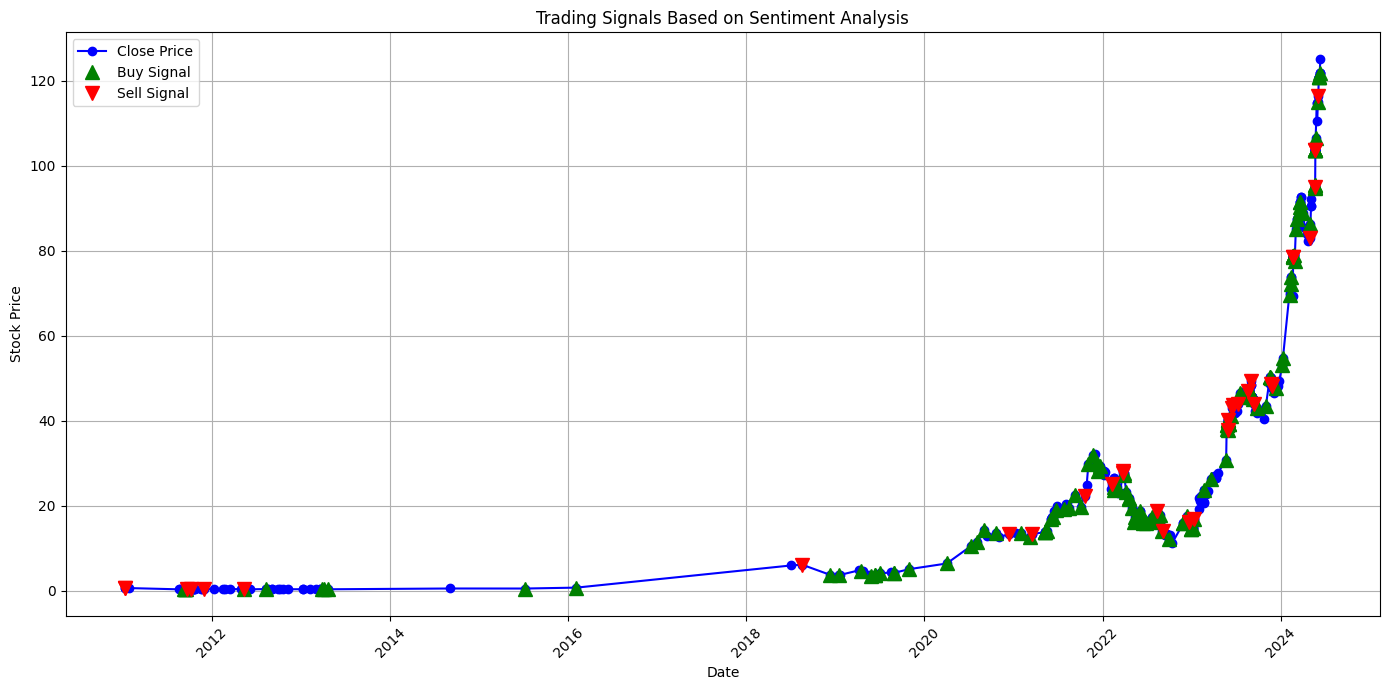

Final Portfolio Value: $5704928.26
Returns: 569.49
Number of Trades Executed: 47
Win Ratio: 0.49
Sharpe Ratio: inf
Maximum Drawdown: 0.00%


<ipython-input-18-dea5d68a417c>:4: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(252) * (np.mean(returns) / np.std(returns))


In [ ]:
sentiments = merge_df['sentiment'].values
close_prices = merge_df['Close'].values
dates = pd.to_datetime(merge_df['date']).values

# Step 7: Find trading signals
signals = find_trading_signals(sentiments, close_prices)

# Step 8: Plot trading signals
plot_trading_signals(dates, close_prices, signals)

# Step 9: Calculate portfolio returns and performance metrics
final_portfolio_value, returns, num_trades, win_ratio = calculate_portfolio_returns(dates, close_prices, signals)
sharpe_ratio = calculate_sharpe_ratio(returns)
max_drawdown = calculate_maximum_drawdown(returns)

# Step 10: Print performance metrics
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Returns: {returns:.2f}")
print(f"Number of Trades Executed: {num_trades}")
print(f"Win Ratio: {win_ratio:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")